# NLP Result Analysis
Analyse a excel sheet of NLP classification results.
Template is filled in 


Set path of excel sheet

In [1]:
path_excel_sheet = "./../resources/context_results.xlsx"

Set label and classification columns

In [2]:
column_actual = 'label longembolie'
column_predicted = 'target-snomedct:59282003'

Read columns and determine values, in case of key error, make sure the columns are set correctly

In [3]:
import pandas
df = pandas.read_excel(path_excel_sheet, header=0)

label_index = df[column_actual].value_counts().index.tolist() 
classification_index = df[column_predicted].value_counts().index.tolist() 

print('label category values:', label_index)
print('classification category values:', classification_index)

label category values: [True, False]
classification category values: [True, False]


Set valid values (other values will be ignored)

In [4]:
valid_values = [True, False]

Check valid values

In [5]:
df_valid = df[df[column_actual].isin(valid_values)]
df_valid = df_valid[df_valid[column_predicted].isin(valid_values)]

actual_index_valid = df_valid[column_actual].value_counts().index.tolist() 
predicted_index_valid = df_valid[column_actual].value_counts().index.tolist() 

print('actual category values:', actual_index_valid)
print('predicted category values:', predicted_index_valid)

actual category values: [True, False]
predicted category values: [True, False]


Histograms Original

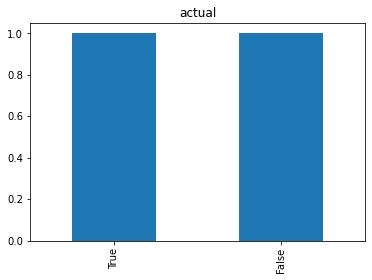

In [6]:
actual_bar_plt = df[column_actual].value_counts().plot(kind='bar', title='actual')

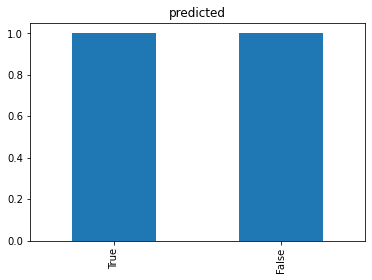

In [7]:
predicted_bar_plt = df[column_predicted].value_counts().plot(kind='bar', title='predicted')

Histograms Valid Values only

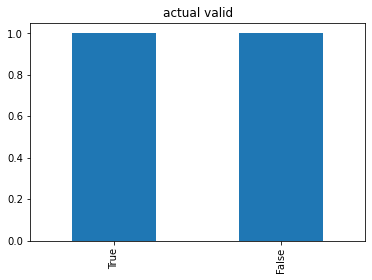

In [8]:
actual_valid_bar_plot = df_valid[column_actual].value_counts().plot(kind='bar', title='actual valid')

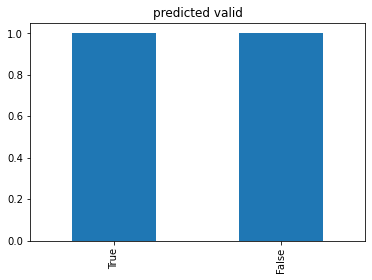

In [9]:
predicted_valid_bar_plt = df_valid[column_predicted].value_counts().plot(kind='bar', title='predicted valid')

Compute accuracy

In [10]:
df = df_valid
accuracy = df[df[column_predicted] == df[column_actual]].shape[0]/df.shape[0]
print("Accuracy = " + str(round(accuracy * 100, 2)) + "%")

Accuracy = 100.0%


F-scores

In [11]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.utils.multiclass import unique_labels
y_actu = pandas.Series(df[column_actual], name='Actual')
y_pred = pandas.Series(df[column_predicted], name='Predicted')

labels = unique_labels(y_actu, y_pred)
prf = precision_recall_fscore_support(y_actu, y_pred, average=None, labels=valid_values)
evaldf = pandas.DataFrame({"Precision": prf[0], "Recall": prf[1], "F-score": prf[2]}, index=valid_values)
print(evaldf)

       Precision  Recall  F-score
True         1.0     1.0      1.0
False        1.0     1.0      1.0


Create confusion matrix

In [12]:
confusion_matrix = pandas.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("CONFUSION MATRIX")
print(confusion_matrix)

CONFUSION MATRIX
Predicted  False  True  All
Actual                     
False          1     0    1
True           0     1    1
All            1     1    2


Plot confusion matrix

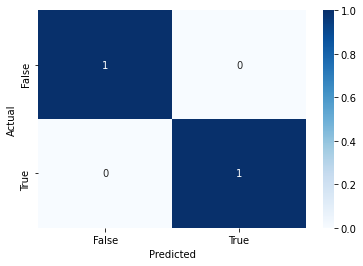

In [13]:
import seaborn
import matplotlib
data = {'y_Actual':    df_valid[column_predicted],
        'y_Predicted': df_valid[column_actual]
        }

df = pandas.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pandas.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

confusion_matrix_heatmap = seaborn.heatmap(confusion_matrix, annot=True, cmap=matplotlib.cm.Blues)

Save confusion matix figure to file

In [14]:
file_type_eps = False
output_path = './../resources/confusion_matrix'

if file_type_eps:
    confusion_matrix_heatmap.figure.savefig(output_path + ".eps", dict="eps")
else:
   confusion_matrix_heatmap.figure.savefig(output_path + ".png")